In [1]:
import pandas as pd
Toyota_data=pd.read_csv("ToyotaCorolla.csv",encoding="ISO-8859-1")
#Toyota_data.head()
Sorted_data=Toyota_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Sorted_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [2]:
Sorted_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [4]:
#Scatterplot between variables along with histogram
import seaborn as sns
#sns.pairplot(Sorted_data)

In [5]:
#Preparing a first model
import statsmodels.formula.api as smf
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Sorted_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:04:58   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Simple Regression Model
ml_cc=smf.ols('Price~cc',data=Sorted_data).fit()
ml_cc.summary()

In [19]:
#Simple Regression Model
ml_doors=smf.ols('Price~Doors',data=Sorted_data).fit()
ml_doors.summary()

In [20]:
ml_cc_doors=smf.ols('Price~cc+Doors',data=Sorted_data).fit()
ml_cc_doors.summary()

In [9]:
#Calculating VIF +

rsq_Age_08_04=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Sorted_data).fit().rsquared
vif_Age_08_04=1/(1-rsq_Age_08_04)

rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Sorted_data).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=Sorted_data).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=Sorted_data).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Sorted_data).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=Sorted_data).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=Sorted_data).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_Weight=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=Sorted_data).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

#Storing vif values in a data frame
d1={'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

#All variables VIF value is < 5 so no need to drop any column

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


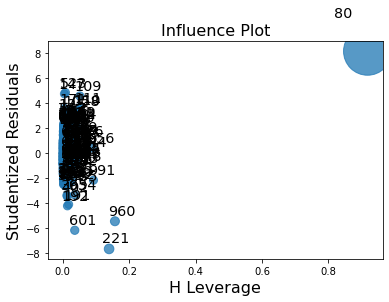

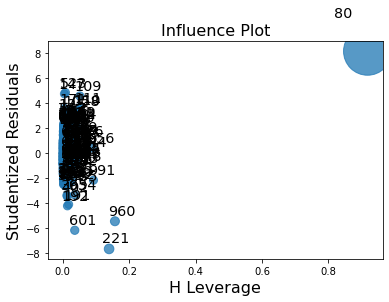

In [10]:
#Model Deletion Diagnostics
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [21]:
#Removing Outlier from model1
Corolla_new=Sorted_data.drop(Sorted_data.index[80],axis=0)

In [12]:
#Building Our second Model
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:06:28   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

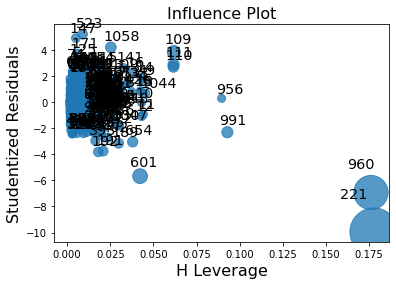

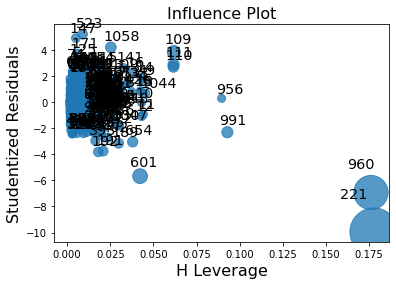

In [13]:
#Model Deletion Diagnostics of model 2
import statsmodels.api as sm
sm.graphics.influence_plot(model2)

In [14]:
#Building Our Third Model
#Removing Outlier from model2
Corolla_new1=Sorted_data.drop(Sorted_data.index[[80,960,221]],axis=0)
model3=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla_new1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:11:39   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Storing R^2 values in a data frame
rsqr_model1=model1.rsquared
rsqr_model2=model2.rsquared
rsqr_model3=model3.rsquared

d1={'Model':['model1','model2','model3'],'R^2 values':[rsqr_model1,rsqr_model2,rsqr_model3]}
rsqr_frame=pd.DataFrame(d1)
rsqr_frame

#After analysis of all three model model3 have highest R^2 value so we consider model3 as our final model

,Model,R^2 values
0,model1,0.863763
1,model2,0.869379
2,model3,0.885185


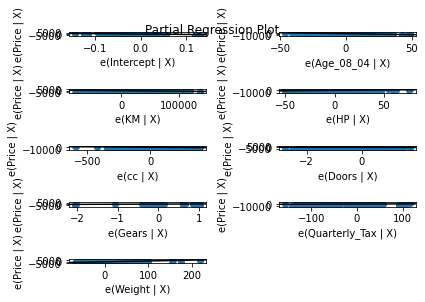

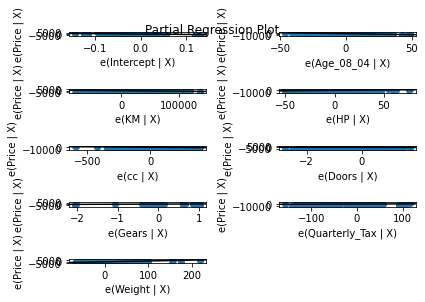

In [15]:
#Partial Regression Plot
sm.graphics.plot_partregress_grid(model3)

In [17]:
price_pred=model3.predict(Corolla_new1[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]])
from ml_metrics import rmse
rmse(price_pred,Corolla_new1.Price)

1227.473986005888

In [23]:
#Predicted Price based on "Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"
price_pred.head()

0    16333.273814
1    15892.326850
2    16310.886081
3    15979.990390
4    15846.536733
dtype: float64

In [24]:
#Original Price
Corolla_new1.Price.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

Text(0, 0.5, 'Predicted price')

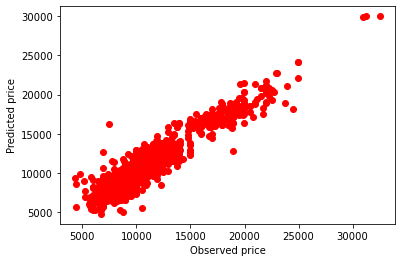

In [25]:
#Scatter plot of actual values vs predicted values
import matplotlib.pyplot as plt
plt.scatter(Corolla_new1.Price,price_pred,c='r');plt.xlabel("Observed price");plt.ylabel("Predicted price")


Text(0, 0.5, 'residuals')

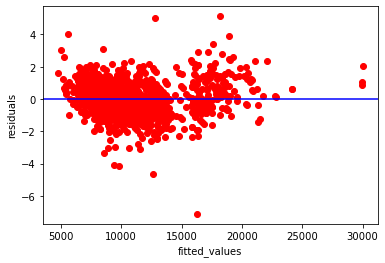

In [26]:
# Residuals VS Fitted Values 
plt.scatter(price_pred,model3.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")

(array([  1.,   0.,   3.,  16., 157., 723., 436.,  87.,   6.,   4.]),
 array([-7.11152315, -5.88819747, -4.6648718 , -3.44154612, -2.21822044,
        -0.99489476,  0.22843092,  1.4517566 ,  2.67508227,  3.89840795,
         5.12173363]),
 <a list of 10 Patch objects>)

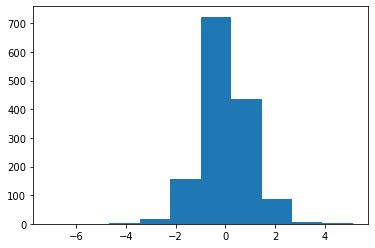

In [27]:
#Normality plot for residuals 
# histogram
plt.hist(model3.resid_pearson) 
# After seen histogram it looks like the standardized residuals are normally distributed

((array([-3.29990572, -3.0423199 , -2.89905096, ...,  2.89905096,
          3.0423199 ,  3.29990572]),
  array([-7.11152315, -4.61523681, -4.13985897, ...,  4.01261664,
          5.00012015,  5.12173363])),
 (0.9842286314351268, -3.1406323962851847e-12, 0.9853340591988012))

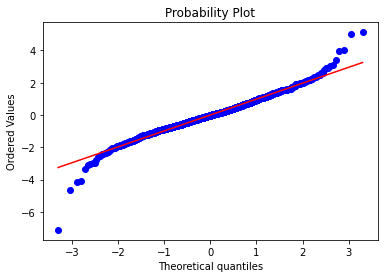

In [28]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st
st.probplot(model3.resid_pearson, dist="norm", plot=pylab)

In [29]:
#Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
corolla_train,corolla_test  = train_test_split(Corolla_new1,test_size = 0.2)

In [30]:
# preparing the model on train data 

model_train = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla_train).fit()

In [31]:
# train_data prediction
train_pred = model_train.predict(corolla_train)

In [34]:
# train residual values 
train_resid  = train_pred - corolla_train.Price
#train_resid

In [39]:
# RMSE value for train data 
import numpy as np

rmse(train_pred,corolla_train.Price)
#OR
#train_rmse = np.sqrt(np.mean(train_resid*train_resid))
#train_rmse

1235.7336539482887

In [41]:
# prediction on test data set 
test_pred = model_train.predict(corolla_test)

In [44]:
# test residual values 
test_resid  = test_pred - corolla_test.Price

In [46]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse
#OR
#rmse(test_pred,corolla_test.Price)

1195.7332799700898